# BIRTHDAY PARADOX 
In a group of just 23 randomly selected people, there is approximately a 50.7% chance that at least two individuals share the same birthday.This probability exceeds 50% at 23 people, which is surprising to many because it seems like a much larger group would be needed for such a likelihood.

In [27]:
import pandas as pd 
import math
df= pd.read_csv("Data_sets/nba.csv")
df.head(4)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0


### Script to add Birthday column

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load dataset
df = pd.read_csv("Data_sets/nba.csv")

# Fix seed for reproducibility (optional)
np.random.seed(5)

# Reference date (e.g., start of season)
reference_date = datetime(2017, 10, 1)

def generate_birthday(age):
    if pd.isna(age):
        return None
    # Estimate birth year
    birth_year = reference_date.year - int(age)
    
    # Random day of the year (handles leap years safely)
    start_date = datetime(birth_year, 1, 1)
    end_date = datetime(birth_year, 12, 31)
    random_days = np.random.randint(0, (end_date - start_date).days + 1)
    
    birthday = start_date + timedelta(days=random_days)
    return birthday.strftime("%Y-%m-%d")

# Apply birthday generation
df["Birth day"] = df["Age"].apply(generate_birthday)



In [49]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Birth day
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,1992-12-21
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,1992-07-25
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,1990-07-09
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,1995-04-29
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,1988-03-14
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0,1988-01-09
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0,1996-08-16
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0,1992-08-19
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0,1995-04-23
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0,1995-06-08


## Probablity formula of two person out of n share same birthday
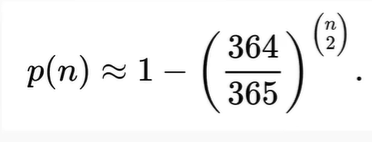

### Implementation of birthday probability function

In [34]:

def ncr(n,r):
    f =math.factorial
    return f(n) /(f(r)*f(n-r))
def probablity(n)-> float:
    return 1-(364/365)**ncr(n,2)

### For 15 people 

In [35]:
probablity(15)

0.25028790861398265

#### Creating a birthday coloumn of month and day in nba dataset

In [ ]:
df["Birth day"] = pd.to_datetime(df["Birth day"])

In [53]:
df["Birthday"]=df['Birth day'].dt.strftime('%m-%d')
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Birth day,Birthday
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,1992-12-21,12-21
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,1992-07-25,07-25
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,1990-07-09,07-09
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,1995-04-29,04-29
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,1988-03-14,03-14
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0,1988-01-09,01-09
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0,1996-08-16,08-16
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0,1992-08-19,08-19
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0,1995-04-23,04-23
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0,1995-06-08,06-08


# Combinations
eg:

In [61]:
from itertools import combinations
names = ["James", "Helina" ,"Roy","Stanlee"]
birthday = ["March 5th", "September 20th","March 5th","September 20th"]


In [62]:
list(combinations(names,2))

[('James', 'Helina'),
 ('James', 'Roy'),
 ('James', 'Stanlee'),
 ('Helina', 'Roy'),
 ('Helina', 'Stanlee'),
 ('Roy', 'Stanlee')]

In [63]:
list(combinations(birthday,2))

[('March 5th', 'September 20th'),
 ('March 5th', 'March 5th'),
 ('March 5th', 'September 20th'),
 ('September 20th', 'March 5th'),
 ('September 20th', 'September 20th'),
 ('March 5th', 'September 20th')]

In [69]:
from itertools import combinations
name_df = pd.DataFrame(combinations(names,2),columns=["Person 1","Person 2"])
name_df

,Person 1,Person 2
0,James,Helina
1,James,Roy
2,James,Stanlee
3,Helina,Roy
4,Helina,Stanlee
5,Roy,Stanlee


In [68]:
from itertools import combinations
birthday_df = pd.DataFrame(combinations(birthday,2),columns=["birthday 1","birthday 2"])
birthday_df

,birthday 1,birthday 2
0,March 5th,September 20th
1,March 5th,March 5th
2,March 5th,September 20th
3,September 20th,March 5th
4,September 20th,September 20th
5,March 5th,September 20th


In [71]:
final_df = pd.concat([name_df,birthday_df],axis=1)
final_df


,Person 1,Person 2,birthday 1,birthday 2
0,James,Helina,March 5th,September 20th
1,James,Roy,March 5th,March 5th
2,James,Stanlee,March 5th,September 20th
3,Helina,Roy,September 20th,March 5th
4,Helina,Stanlee,September 20th,September 20th
5,Roy,Stanlee,March 5th,September 20th


In [73]:
final_df.loc[final_df["birthday 1"]== final_df["birthday 2"],["Person 1","Person 2","birthday 1"]]

,Person 1,Person 2,birthday 1
1,James,Roy,March 5th
4,Helina,Stanlee,September 20th


#### We make the combination of possible pairs of people and their birthdays and then we calculate the probability of two people sharing the same birthday using the formula shown above.

In [92]:
df["Team"]

0      Boston Celtics
1      Boston Celtics
2      Boston Celtics
3      Boston Celtics
4      Boston Celtics
            ...      
453         Utah Jazz
454         Utah Jazz
455         Utah Jazz
456         Utah Jazz
457               NaN
Name: Team, Length: 458, dtype: object

### How many playes of Atlanta Hawks share the same birthday?

In [107]:
team_df = df.loc[df["Team"]=="Utah Jazz"]
team_df.shape

(15, 11)

In [108]:
from itertools import combinations
name_df = pd.DataFrame(combinations(team_df["Name"],2),columns=["Person 1","Person 2"])
name_df

,Person 1,Person 2
0,Trevor Booker,Trey Burke
1,Trevor Booker,Alec Burks
2,Trevor Booker,Dante Exum
3,Trevor Booker,Derrick Favors
4,Trevor Booker,Rudy Gobert
...,...,...
100,Shelvin Mack,Tibor Pleiss
101,Shelvin Mack,Jeff Withey
102,Raul Neto,Tibor Pleiss
103,Raul Neto,Jeff Withey


In [109]:
from itertools import combinations
birthday_df = pd.DataFrame(combinations(team_df["Birthday"],2),columns=["birthday 1","birthday 2"])
birthday_df

,birthday 1,birthday 2
0,03-12,08-07
1,03-12,05-27
2,03-12,01-30
3,03-12,08-23
4,03-12,10-17
...,...,...
100,03-12,09-29
101,03-12,03-25
102,01-17,09-29
103,01-17,03-25


In [110]:
birthday_df.loc[birthday_df["birthday 1"]==birthday_df["birthday 2"]]

,birthday 1,birthday 2
10,03-12,03-12


In [111]:
Final_team_df = pd.concat([name_df,birthday_df],axis=1)
Final_team_df

,Person 1,Person 2,birthday 1,birthday 2
0,Trevor Booker,Trey Burke,03-12,08-07
1,Trevor Booker,Alec Burks,03-12,05-27
2,Trevor Booker,Dante Exum,03-12,01-30
3,Trevor Booker,Derrick Favors,03-12,08-23
4,Trevor Booker,Rudy Gobert,03-12,10-17
...,...,...,...,...
100,Shelvin Mack,Tibor Pleiss,03-12,09-29
101,Shelvin Mack,Jeff Withey,03-12,03-25
102,Raul Neto,Tibor Pleiss,01-17,09-29
103,Raul Neto,Jeff Withey,01-17,03-25


In [112]:
Final_team_df.loc[Final_team_df["birthday 1"]==Final_team_df["birthday 2"],["Person 1","Person 2","birthday 1"]]

,Person 1,Person 2,birthday 1
10,Trevor Booker,Shelvin Mack,03-12


## Combined Function to check birthday paradox in any team

In [117]:
from itertools import combinations
 
def Birthday_paradox(team_name):
    team_df = df.loc[df["Team"]=="Utah Jazz"]
    name_df = pd.DataFrame(combinations(team_df["Name"],2),columns=["Person 1","Person 2"])
    birthday_df = pd.DataFrame(combinations(team_df["Birthday"],2),columns=["birthday 1","birthday 2"])
    Final_team_df = pd.concat([name_df,birthday_df],axis=1)
    answer=Final_team_df.loc[Final_team_df["birthday 1"]==Final_team_df["birthday 2"],["Person 1","Person 2","birthday 1"]]
    return answer

In [118]:
Birthday_paradox("Dallas Mavericks")

,Person 1,Person 2,birthday 1
10,Trevor Booker,Shelvin Mack,03-12
